# Visualizacion de los datos


In [ ]:
# cargamos librerías necesarias
import numpy as np
import pandas as pd
import zipfile

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install feature.engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 18.0 MB/s eta 0:00:00


In [ ]:
ARG_csv = pd.read_csv('/content/EMSE_DatosAbiertos.csv', sep= ';', decimal='.')
pd.options.display.max_columns = None #Para poder ver todas la columnas ya que trasponiendo son 89 colunas y me continua poniendo puntos suspensivos
ARG_csv.head()

,sitio,record,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q30 Other tobacco use,q31 Smoking cessation,q32 Smoking in their presence,q33 Parental tobacco use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,q59,q60,q61 Fruit consumption past 7 days,q62 Vegetable consumption past 7 days,q63 Soft drink consumption past 7 days,q64,q65,q66 Bullied on school property in past 12 months,q67 Bullied not on school property in past 12 months,q68 Cyber bullied in past 12 months,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,qn10 Did not eat food from a fast food restaurant (qn10),qn15 Were physically attacked,qn16 Were in a physical fight,qn17 Were seriously injured,qn18 Reported that their most serious injury was a broken bone or dislocated joint,qn19 Reported that their most serious injury was caused by a motor vehicle accident or being hit by a motor vehicle (qn19),qn22 Most of the time or always felt lonely,qn23 Most of the time or always were so worried about something that they could not sleep at night,qn24 Seriously considered attempting suicide,qn25 Made a plan about how they would attempt suicide,qn26 Attempted suicide,qn27 Did not have any close friends,qn28 Tried a cigarette before age 14 years,qn29 Currently smoked cigarettes,qn30 Currently used any tobacco products other than cigarettes,qn31 Tried to quit smoking cigarettes,qn32 Reported that people smoked in their presence,qn33 Had parents or guardians who used any form of tobacco,qn34 Drank alcohol before age 14 years,qn35 Currently drank alcohol,qn36 Usually drank two or more drinks per day,qn37 Usually obtained the alcohol they drank from friends,qn38 Ever drank so much alcohol that they were really drunk,"qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol",qn41 Ever used marijuana,qn42 Currently used marijuana,qn43 Ever used amphethamines or methamphetamines,qn44 Ever had sexual intercourse,qn45 Had sexual intercourse before age 14 years,qn46 Had sexual intercourse with two or more persons,qn47 Used a condom,qn48 Used a method of birth control other than condoms,qn49 Were not physically active,qn50 Did not walk or ride a bicycle to or from school,qn51 Did not attend physical education classes,qn52 Spent three or more hours per day doing sitting activities,qn54 Reported that most of the students in their school were most of the time or always kind and helpful,qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done,qn56 Reported that their parents or guardians most of the time or always understood their problems and worries,qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time,qn58 Reported that their parents or guardians never or rarely went through their things without their approval,qn59,qn60,qn61 Ate fruit two or more times per day in past 7 days,qn62 Ate vegetables two or m

In [ ]:

print(ARG_csv.shape)

(56981, 155)


In [ ]:
ARG_csv.head()

,sitio,record,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q30 Other tobacco use,q31 Smoking cessation,q32 Smoking in their presence,q33 Parental tobacco use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,q59,q60,q61 Fruit consumption past 7 days,q62 Vegetable consumption past 7 days,q63 Soft drink consumption past 7 days,q64,q65,q66 Bullied on school property in past 12 months,q67 Bullied not on school property in past 12 months,q68 Cyber bullied in past 12 months,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,qn10 Did not eat food from a fast food restaurant (qn10),qn15 Were physically attacked,qn16 Were in a physical fight,qn17 Were seriously injured,qn18 Reported that their most serious injury was a broken bone or dislocated joint,qn19 Reported that their most serious injury was caused by a motor vehicle accident or being hit by a motor vehicle (qn19),qn22 Most of the time or always felt lonely,qn23 Most of the time or always were so worried about something that they could not sleep at night,qn24 Seriously considered attempting suicide,qn25 Made a plan about how they would attempt suicide,qn26 Attempted suicide,qn27 Did not have any close friends,qn28 Tried a cigarette before age 14 years,qn29 Currently smoked cigarettes,qn30 Currently used any tobacco products other than cigarettes,qn31 Tried to quit smoking cigarettes,qn32 Reported that people smoked in their presence,qn33 Had parents or guardians who used any form of tobacco,qn34 Drank alcohol before age 14 years,qn35 Currently drank alcohol,qn36 Usually drank two or more drinks per day,qn37 Usually obtained the alcohol they drank from friends,qn38 Ever drank so much alcohol that they were really drunk,"qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol",qn41 Ever used marijuana,qn42 Currently used marijuana,qn43 Ever used amphethamines or methamphetamines,qn44 Ever had sexual intercourse,qn45 Had sexual intercourse before age 14 years,qn46 Had sexual intercourse with two or more persons,qn47 Used a condom,qn48 Used a method of birth control other than condoms,qn49 Were not physically active,qn50 Did not walk or ride a bicycle to or from school,qn51 Did not attend physical education classes,qn52 Spent three or more hours per day doing sitting activities,qn54 Reported that most of the students in their school were most of the time or always kind and helpful,qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done,qn56 Reported that their parents or guardians most of the time or always understood their problems and worries,qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time,qn58 Reported that their parents or guardians never or rarely went through their things without their approval,qn59,qn60,qn61 Ate fruit two or more times per day in past 7 days,qn62 Ate vegetables two or m

In [ ]:
print(ARG_csv.isnull().sum())
#print(ARG_csv.dtypes)

sitio                                                                  0
record                                                                 0
q1 Custom Age                                                        108
q2 Sex                                                               536
q3 In what grade are you                                            1061
                                                                    ... 
qnpe3g Attended physical education classes on three or more days    1949
qnpe5g Attended physical education classes on five or more days     1949
weight                                                                 0
stratum                                                                0
psu                                                                    0
Length: 155, dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##PREPROCESADO

In [ ]:
def drop_null_columns(df, threshold):
    null_column=[]
    for column in df.columns:
        null_percentage = df[column].isnull().sum() / len(df) * 100
        if null_percentage > threshold:
            print(f"El porcentaje de valores nulos en la columna {column} es mayor al {threshold}% es de {null_percentage}")
            null_column.append(column)
    print("Columnas null: ",null_column )
    print("numero de columnas null: ",len(null_column) )
    for column in null_column:
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
df_procesado = drop_null_columns(ARG_csv, 37)

El porcentaje de valores nulos en la columna qn18 Reported that their most serious injury was a broken bone or dislocated joint es mayor al 37% es de 74.7705375476036
El porcentaje de valores nulos en la columna qn19 Reported that their most serious injury was caused by a motor vehicle accident or being hit by a motor vehicle (qn19) es mayor al 37% es de 74.11417841034731
El porcentaje de valores nulos en la columna qn28 Tried a cigarette before age 14 years es mayor al 37% es de 60.509643565398996
El porcentaje de valores nulos en la columna qn31 Tried to quit smoking cigarettes  es mayor al 37% es de 80.08107965813166
El porcentaje de valores nulos en la columna qn36 Usually drank two or more drinks per day  es mayor al 37% es de 45.072919043189835
El porcentaje de valores nulos en la columna qn37 Usually obtained the alcohol they drank from friends es mayor al 37% es de 47.589547392990646
El porcentaje de valores nulos en la columna qn45 Had sexual intercourse before age 14 years es

In [ ]:
df_procesado.shape

(56981, 139)

In [ ]:
df_procesado.head()

,sitio,record,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q30 Other tobacco use,q31 Smoking cessation,q32 Smoking in their presence,q33 Parental tobacco use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,q59,q60,q61 Fruit consumption past 7 days,q62 Vegetable consumption past 7 days,q63 Soft drink consumption past 7 days,q64,q65,q66 Bullied on school property in past 12 months,q67 Bullied not on school property in past 12 months,q68 Cyber bullied in past 12 months,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,qn10 Did not eat food from a fast food restaurant (qn10),qn15 Were physically attacked,qn16 Were in a physical fight,qn17 Were seriously injured,qn22 Most of the time or always felt lonely,qn23 Most of the time or always were so worried about something that they could not sleep at night,qn24 Seriously considered attempting suicide,qn25 Made a plan about how they would attempt suicide,qn26 Attempted suicide,qn27 Did not have any close friends,qn29 Currently smoked cigarettes,qn30 Currently used any tobacco products other than cigarettes,qn32 Reported that people smoked in their presence,qn33 Had parents or guardians who used any form of tobacco,qn34 Drank alcohol before age 14 years,qn35 Currently drank alcohol,qn38 Ever drank so much alcohol that they were really drunk,"qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol",qn41 Ever used marijuana,qn42 Currently used marijuana,qn43 Ever used amphethamines or methamphetamines,qn44 Ever had sexual intercourse,qn46 Had sexual intercourse with two or more persons,qn49 Were not physically active,qn50 Did not walk or ride a bicycle to or from school,qn51 Did not attend physical education classes,qn52 Spent three or more hours per day doing sitting activities,qn54 Reported that most of the students in their school were most of the time or always kind and helpful,qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done,qn56 Reported that their parents or guardians most of the time or always understood their problems and worries,qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time,qn58 Reported that their parents or guardians never or rarely went through their things without their approval,qn59,qn60,qn61 Ate fruit two or more times per day in past 7 days,qn62 Ate vegetables two or more times per day in past 7 days,qn63 Drank carbonated soft drink one or more times per day in past 7 days,qn64,qn65,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qn69 Were underweight,qn70,qn76,qn77,qn78,qn79,qn80,qn81,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,qnff1g Ate food from a fast food restaurant one or more days,qnff2g Ate food from a fast food restaurant two or more days,qnff3g Ate food from a fa

Eliminamos todas las columnas que no tengan información o que son datos repetidos

In [ ]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
columns_to_drop = ["sitio", "record", "weight", "stratum", "psu", "q59", "q60", "q64", "q65", "q69", "q70", "q71", "q72", "q73", "q74", "q75", "q76", "q77", "q78", "q79", "q80", "q81", "qn59", "qn60", "qn64", "qn65", "qn70", "qn76", "qn77", "qn78", "qn79", "qn80", "qn81","q66 Bullied on school property in past 12 months","q67 Bullied not on school property in past 12 months","q68 Cyber bullied in past 12 months"]
df = drop_columns(df_procesado, columns_to_drop)

In [ ]:
columns_to_drop=["qn10 Did not eat food from a fast food restaurant (qn10)","qnff1g Ate food from a fast food restaurant one or more days", "qnff3g Ate food from a fast food restaurant three or more days", "qn15 Were physically attacked ", "qn16 Were in a physical fight", "qn17 Were seriously injured", "qn22 Most of the time or always felt lonely ", "qn23 Most of the time or always were so worried about something that they could not sleep at night", "qn24 Seriously considered attempting suicide", "qn25 Made a plan about how they would attempt suicide", "qn26 Attempted suicide", "qn27 Did not have any close friends", "qn29 Currently smoked cigarettes", "qn30 Currently used any tobacco products other than cigarettes", "qntob2g Currently used any tobacco product", "qnff2g Ate food from a fast food restaurant two or more days", "qn32 Reported that people smoked in their presence", "qn33 Had parents or guardians who used any form of tobacco", "qn34 Drank alcohol before age 14 years", "qn35 Currently drank alcohol", "qn38 Ever drank so much alcohol that they were really drunk", "qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol ", "qn41 Ever used marijuana ", "qn42 Currently used marijuana", "qn43 Ever used amphethamines or methamphetamines", "qn44 Ever had sexual intercourse", "qn46 Had sexual intercourse with two or more persons", "qn49 Were not physically active", "qnpa5g Were physically active at least 60 minutes per day on 5 or more days", "qnpa7g Were physically active at least 60 minutes per day on all 7 days", "qn50 Did not walk or ride a bicycle to or from school", "qn51 Did not attend physical education classes", "qnpe3g Attended physical education classes on three or more days", "qnpe5g Attended physical education classes on five or more days", "qn52 Spent three or more hours per day doing sitting activities", "qn54 Reported that most of the students in their school were most of the time or always kind and helpful", "qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done", "qn56 Reported that their parents or guardians most of the time or always understood their problems and worries", "qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time", "qn58 Reported that their parents or guardians never or rarely went through their things without their approval ", "qn61 Ate fruit two or more times per day in past 7 days", "qn62 Ate vegetables two or more times per day in past 7 days", "qn63 Drank carbonated soft drink one or more times per day in past 7 days","qnnotb2g Did not currently use any tobacco products"]
df = drop_columns(df, columns_to_drop)

In [ ]:
columns_to_drop=["q30 Other tobacco use", "q31 Smoking cessation","q32 Smoking in their presence", "q33 Parental tobacco use", "q61 Fruit consumption past 7 days","q62 Vegetable consumption past 7 days", "q63 Soft drink consumption past 7 days ","qn69 Were underweight"]
df = drop_columns(df, columns_to_drop)

In [ ]:
df.shape

(56981, 51)

In [ ]:
df = df.dropna(subset=['q15 Physically attacked'], axis=0)
df = df.dropna(subset=['qn66 Bullied on school property in past 12 months','qn67 Bullied not on school property in past 12 months','qn68 Cyber bullied in past 12 months'], axis=0)

In [ ]:
df.shape
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese
0,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,NaN,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,3.0,2.0,2.0,1.0,4.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
df.shape

(54910, 51)

In [ ]:
df_null= df.dropna(axis=0)

In [ ]:
df_null.shape

(23001, 52)

In [ ]:
#Renombramos el df para trbajar con el
df=df_null

In [ ]:
df.shape

(23001, 52)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/depurado.csv', index=False)

##Analisis de Datos

In [ ]:
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,mas_de_la_mitad_nulos
9,5.0,1.0,2.0,1.64,45.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,2.0,3.0,8.0,6.0,6.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,False
26,3.0,2.0,2.0,1.57,47.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,False
30,3.0,2.0,2.0,1.60,47.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,6.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,False
31,3.0,1.0,2.0,1.57,40.0,1.0,3.0,1.0,3.0,2.0,8.0,8.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,6.0,3.0,3.0,2.0,4.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,False
33,3.0,2.0,2.0,1.48,45.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,False


In [ ]:
df.shape

(23001, 51)

In [ ]:
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese
9,5.0,1.0,2.0,1.64,45.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,2.0,3.0,8.0,6.0,6.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
26,3.0,2.0,2.0,1.57,47.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
30,3.0,2.0,2.0,1.60,47.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,6.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
31,3.0,1.0,2.0,1.57,40.0,1.0,3.0,1.0,3.0,2.0,8.0,8.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,6.0,3.0,3.0,2.0,4.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0
33,3.0,2.0,2.0,1.48,45.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0


In [ ]:
print(df.dtypes)


q1 Custom Age                                            float64
q2 Sex                                                   float64
q3 In what grade are you                                 float64
q4 How tall are you                                      float64
q5 How much do you weigh                                 float64
q6 How often went hungry                                 float64
q10 Fast food eating                                     float64
q15 Physically attacked                                  float64
q16 Physical fighting                                    float64
q17 Seriously injured                                    float64
q18 Serious injury type                                  float64
q19 Serious injury cause                                 float64
q22 Felt lonely                                          float64
q23 Could not sleep                                      float64
q24 Considered suicide                                   float64
q25 Made a suicide plan  

In [ ]:
df = df.reset_index()

In [ ]:

df = df.assign(risk_bullying=np.zeros(df.shape[0]))
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months']==1 or df.loc[i, 'qn67 Bullied not on school property in past 12 months']==1 or df.loc[i, 'qn67 Bullied not on school property in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
    

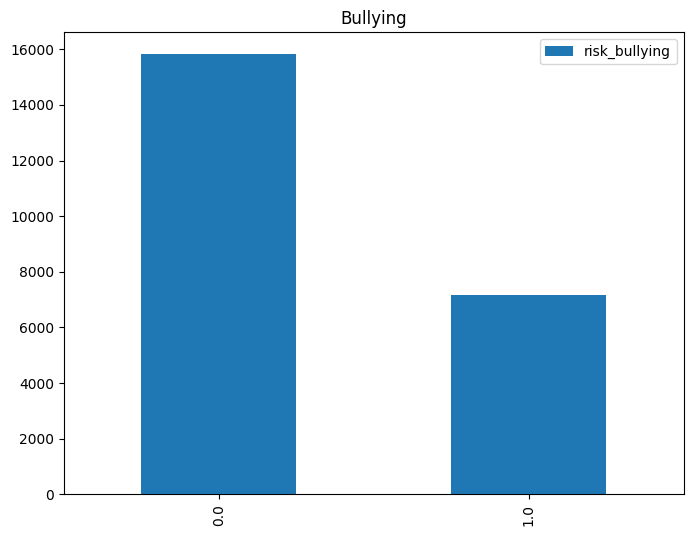

In [ ]:
# Crearmos una grafica con los alumnos que tienen algún tipo de bullying

fig, ax = plt.subplots(figsize=(8, 6))

# Crear un DataFrame con la cuenta de valores de la columna 'risk_bullying'
aux_df = pd.DataFrame(df['risk_bullying'].value_counts(sort=False).sort_index())

# Crear un gráfico de barras con los datos del DataFrame 'aux_df'
aux_df.plot(kind='bar', title='Bullying', ax=ax)

# Mostrar el gráfico
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un DataFrame con la cuenta de valores de la columna 'risk_bullying'
aux_df = pd.DataFrame(df['risk_bullying'].value_counts(sort=False).sort_index())

# Crear un gráfico circular con los datos del DataFrame 'aux_df'
aux_df.plot(kind='pie', y='risk_bullying', ax=ax)

# Añadir título
ax.set_title('Bullying')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crearmos una grafica con los alumnos que tienen algún tipo de bullying

fig, ax = plt.subplots(figsize=(8, 6))

# Crear un DataFrame con la cuenta de valores de la columna 'risk_bullying'
aux_df = pd.DataFrame(df['q15 Physically attacked'].value_counts(sort=False).sort_index())

# Crear un gráfico de barras con los datos del DataFrame 'aux_df'
aux_df.plot(kind='bar', title='Physical Attacked', ax=ax)

# Mostrar el gráfico
plt.show()

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'q15 Physically attacked'] == 1:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'q15 Physically attacked'] > 1:
    df.loc[i, 'bullying'] = 1  

In [ ]:
# Crearmos una grafica con los alumnos que tienen algún tipo de bullying

fig, ax = plt.subplots(figsize=(8, 6))

# Crear un DataFrame con la cuenta de valores de la columna 'risk_bullying'
aux_df = pd.DataFrame(df['bullying'].value_counts(sort=False).sort_index())

# Crear un gráfico de barras con los datos del DataFrame 'aux_df'
aux_df.plot(kind='bar', title='Physical Attacked', ax=ax)

# Mostrar el gráfico
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un DataFrame con la cuenta de valores de la columna 'risk_bullying'
aux_df = pd.DataFrame(df['bullying'].value_counts(sort=False).sort_index())

# Crear un gráfico circular con los datos del DataFrame 'aux_df'
aux_df.plot(kind='pie', y='bullying', ax=ax)

# Añadir título
ax.set_title('Ataque fisico')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df['qn66 Bullied on school property in past 12 months'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Bullied_on_school_property_in_past_12_months', ax=axs[0])

# Gráfico 2
aux_df = pd.DataFrame(df['qn67 Bullied not on school property in past 12 months'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Bullied_not_on_school_property_in_past_12_months' , ax=axs[1])

# Gráfico 3
aux_df = pd.DataFrame(df['qn68 Cyber bullied in past 12 months'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Cyber_bullied_in_past_12_months' , ax=axs[2])

# Mostrar los gráficos
plt.show()




In [ ]:
# Contar los valores iguales a 0 y 1 en una columna
no_Bullied_on_school_property_in_past_12_months =df['qn66 Bullied on school property in past 12 months'].value_counts()[2]
Si_Bullied_on_school_property_in_past_12_months =df['qn66 Bullied on school property in past 12 months'].value_counts()[1]

# Contar los valores iguales a 0 y 1 en otra columna
NO_Bullied_not_on_school_property_in_past_12_months = df['qn67 Bullied not on school property in past 12 months'].value_counts()[2]
SI_Bullied_not_on_school_property_in_past_12_months = df['qn67 Bullied not on school property in past 12 months'].value_counts()[1]
# Contar los valores iguales a 0 y 1 en otra columna
NO_Cyber_bullied_in_past_12_months = df['qn68 Cyber bullied in past 12 months'].value_counts()[2]
SI_Cyber_bullied_in_past_12_months = df['qn68 Cyber bullied in past 12 months'].value_counts()[1]

# Imprimir los resultados
print(f"Número de en Bullied_on_school_property_in_past_12_months: {no_Bullied_on_school_property_in_past_12_months}")
print(f"Número de casos en Bullied_on_school_property_in_past_12_months: {Si_Bullied_on_school_property_in_past_12_months}")
print ("porcetaje ",  round((Si_Bullied_on_school_property_in_past_12_months/(Si_Bullied_on_school_property_in_past_12_months+no_Bullied_on_school_property_in_past_12_months))*100,2 ))
print("-------------------------------")
print(f"Número de en Bullied_not_on_school_property_in_past_12_months: {NO_Bullied_not_on_school_property_in_past_12_months}")
print(f"Número de casos en Bullied_not_on_school_property_in_past_12_months: {SI_Bullied_not_on_school_property_in_past_12_months}")
print ("porcetaje ",  round((SI_Bullied_not_on_school_property_in_past_12_months/(SI_Bullied_not_on_school_property_in_past_12_months+NO_Bullied_not_on_school_property_in_past_12_months))*100,2 ))
print("-------------------------------")
print(f"Número de  en Cyber_bullied_in_past_12_months: {NO_Cyber_bullied_in_past_12_months}")
print(f"Número de casos en Cyber_bullied_in_past_12_months: {SI_Cyber_bullied_in_past_12_months}")
print ("porcetaje ",  round((SI_Cyber_bullied_in_past_12_months/(SI_Cyber_bullied_in_past_12_months+NO_Cyber_bullied_in_past_12_months))*100,2 ))


In [ ]:
df.describe()

In [ ]:
df.head().T

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df['q1 Custom Age'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Custom_Age', ax=axs[0])
# Gráfico 2
aux_df = pd.DataFrame(df['qnowtg Were overweight '].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='overweight' , ax=axs[1])

# Gráfico 3
aux_df = pd.DataFrame(df['qnobeseg Were obese'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='obese' , ax=axs[2])

# Gráfico 4
aux_df = pd.DataFrame(df['qnunwtg'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='underweight' , ax=axs[3])
# Gráfico 5
aux_df = pd.DataFrame(df['q22 Felt lonely'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Felt lonely' , ax=axs[4])


# Mostrar los gráficos
plt.show()



In [ ]:
# Crear 2 gráficos diferentes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['q1 Custom Age', 'risk_bullying'])['risk_bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Custom_Age')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['q27 Close friends', 'risk_bullying'])['risk_bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Close_friends')


plt.tight_layout()
plt.show()

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['qnowtg Were overweight ', 'risk_bullying'])['risk_bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('overweight')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['qnobeseg Were obese', 'risk_bullying'])['risk_bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('obese')

# Gráfico 3
aux_df = pd.DataFrame(df.groupby(['qnunwtg', 'risk_bullying'])['risk_bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('underweight')

plt.tight_layout()
plt.show()

In [ ]:
result_Were_overweight = (df['risk_bullying'] == 1) & (df['qnowtg Were overweight '] == 1)
subset = df[result_Were_overweight]
print("Los niños con sobrepeso y que tienen bullyn en el colegio son: " , subset.shape[0])
total_sobrepeso=(df['qnowtg Were overweight '] == 1)
s=df[total_sobrepeso]
print(f'Los niños con sobrepeso: {s.shape[0]} \nPor lo tanto el porcentaje anterior nos quedaria {round((subset.shape[0]/s.shape[0])*100, 2)}% ')

In [ ]:
result_Were_obese = (df['risk_bullying'] == 1) & (df['qnobeseg Were obese'] == 1)
subset = df[result_Were_obese]
print("Los niños con obesidad y que tienen bullyn en el colegio son: " , subset.shape[0])
total_obeso=(df['qnobeseg Were obese'] == 1)
s=df[total_obeso]
print(f'Los niños con sobrepeso: {s.shape[0]} \nPor lo tanto el porcentaje anterior nos quedaria {round((subset.shape[0]/s.shape[0])*100, 2)}% ')

In [ ]:
result_Were_underweight = (df['risk_bullying'] == 1) & (df['qnunwtg'] == 1)
subset = df[result_Were_underweight]
print("Los niños por debajo de peso y que tienen bullyn en el colegio son: " , subset.shape[0])
total_delgado=(df['qnunwtg'] == 1)
s=df[total_delgado]
print(f'Los niños por debajo de peso: {s.shape[0]} \nPor lo tanto el porcentaje anterior nos quedaria {round((subset.shape[0]/s.shape[0])*100, 2)}% ')

In [ ]:
# Crear 2 gráficos diferentes para ataques fisicos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['q1 Custom Age', 'bullying'])['bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Custom_Age')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['q27 Close friends', 'bullying'])['bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Close_friends')


plt.tight_layout()
plt.show()

In [ ]:
# Crear tres gráficos diferentes con ataque físico
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['qnowtg Were overweight ', 'bullying'])['bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('overweight')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['qnobeseg Were obese', 'bullying'])['bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('obese')

# Gráfico 3
aux_df = pd.DataFrame(df.groupby(['qnunwtg', 'bullying'])['bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('underweight')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
cont_bullying=0

cont_fisico=0
cont_amigo=0
cont_solo=0

In [ ]:
df = df.reset_index()

In [ ]:




for i in range(len(df)):
  if df.loc[i, 'risk_bullying'] == 1:
    cont_bullying += 1
    if df.loc[i, 'qnunwtg'] == 1 or df.loc[i, 'qnobeseg Were obese'] == 1 or df.loc[i, 'qnowtg Were overweight '] == 1:
        cont_fisico += 1
    if df.loc[i, 'q27 Close friends'] <=2 :
        cont_amigo += 1
    if df.loc[i, 'q22 Felt lonely'] >=3 :
        cont_solo += 1
    
print(cont_bullying)
print(cont_fisico)
print(f'el porcentaje de niños que presentan algun tipo de bullying y tienen algun tipo de problema fisico: {round((cont_fisico/cont_bullying)*100,2)}')
print(f'el porcentaje de niños que presentan algun tipo de bullying y pocos amigos: {round((cont_amigo/cont_bullying)*100,2)}')
print(f'el porcentaje de niños que presentan algun tipo de bullying y solo: {round((cont_solo/cont_bullying)*100,2)}')




In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labels = ['Felt_lonely', 'Close_friends', 'Peso']
sizes = [round((cont_solo/cont_bullying)*100,2), round((cont_amigo/cont_bullying)*100,2), round((cont_fisico/cont_bullying)*100,2)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'q22 Felt lonely'] >3 :
        df.loc[i, 'solo'] =1
  else:
    df.loc[i, 'solo'] =0

In [ ]:
df.head(50)

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['solo', 'bullying'])['bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Se siente solo frente a ataque fisico')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['solo', 'risk_bullying'])['risk_bullying'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Se siente solo frete a algún tipo de bullying')


plt.tight_layout()
plt.show()

In [ ]:
df.drop('solo', axis=1, inplace=True)
df.head()

##CREACIÓN DE MODELOS

                                                    q1 Custom Age    q2 Sex  \
q1 Custom Age                                            1.000000 -0.019367   
q2 Sex                                                  -0.019367  1.000000   
q3 In what grade are you                                 0.730548  0.024385   
q4 How tall are you                                      0.235278 -0.496570   
q5 How much do you weigh                                 0.219157 -0.257066   
q6 How often went hungry                                 0.027904  0.015214   
q10 Fast food eating                                    -0.032282 -0.001436   
q15 Physically attacked                                 -0.019534 -0.050956   
q16 Physical fighting                                   -0.000339 -0.176717   
q17 Seriously injured                                    0.034690 -0.091356   
q18 Serious injury type                                  0.038652 -0.057315   
q19 Serious injury cause                            

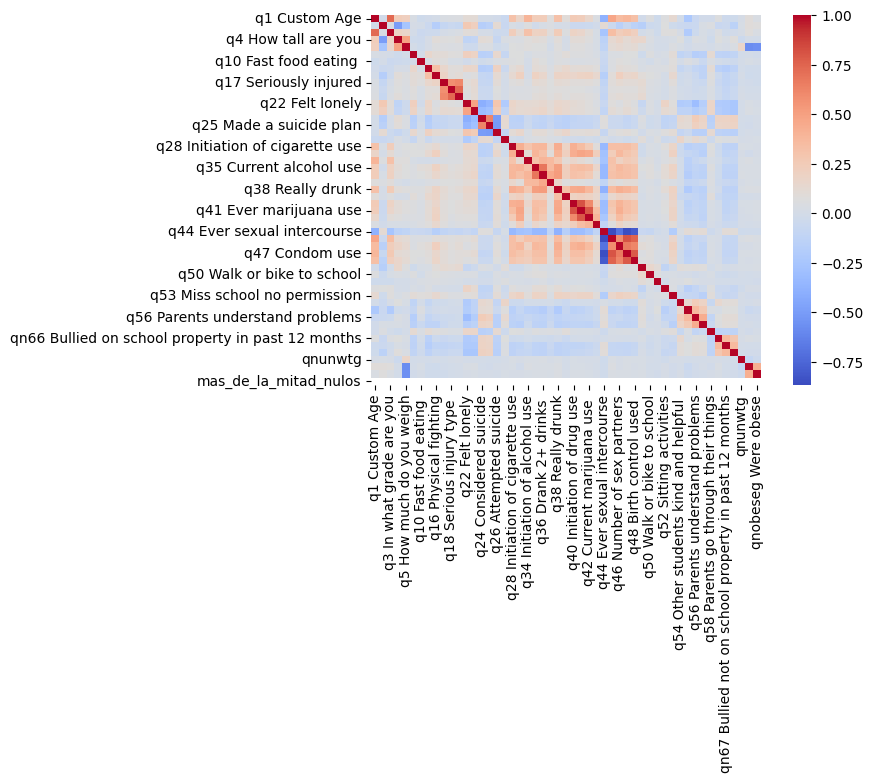

In [ ]:
correlation_matrix = df.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
print(correlation_matrix)

In [ ]:
# Añadimos la nueva columna con ceros
df = df.assign(any_bullying=np.zeros(df.shape[0]))
#df = df.assign(bullying=np.zeros(df.shape[0]))
df.head()

,index,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,mas_de_la_mitad_nulos,any_bullying,risk_bullying,bullying
0,0,5.0,1.0,2.0,1.64,45.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,2.0,3.0,8.0,6.0,6.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,False,0.0,0.0,0.0
1,1,3.0,2.0,2.0,1.57,47.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,False,0.0,0.0,0.0
2,2,3.0,2.0,2.0,1.60,47.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,6.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,False,0.0,0.0,0.0
3,3,3.0,1.0,2.0,1.57,40.0,1.0,3.0,1.0,3.0,2.0,8.0,8.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,6.0,3.0,3.0,2.0,4.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,False,1.0,0.0,0.0
4,4,3.0,2.0,2.0,1.48,45.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,False,1.0,1.0,0.0


In [ ]:
df.head()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:

for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 or df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 or df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1:
    df.loc[i, 'any_bullying'] = 1




In [ ]:
unique_values = df['qn66 Bullied on school property in past 12 months'].unique()
print(unique_values)
dtype = df['qn66 Bullied on school property in past 12 months'].dtype
print(dtype)

[2. 1.]
float64


#Creación de la variable objetivo

In [ ]:
cont=0
df = df.assign(risk_bullying=np.zeros(df.shape[0]))
for i in range(len(df)):
  if df.loc[i, 'any_bullying'] == 1:
    if df.loc[i, 'qn66 Bullied on school property in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
    if df.loc[i, 'qn68 Cyber bullied in past 12 months']==1:
      df.loc[i, 'risk_bullying'] +=1
  #Según el positivo enlas variables de bullying las vamos acumulando en la variable objetivo

In [ ]:
#df = df.drop('mas_de_la_mitad_nulos', axis=1)

In [ ]:
df.head()

,index,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,any_bullying,risk_bullying,bullying
0,0,5.0,1.0,2.0,1.64,45.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,2.0,3.0,8.0,6.0,6.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
1,1,3.0,2.0,2.0,1.57,47.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
2,2,3.0,2.0,2.0,1.60,47.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,6.0,3.0,3.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
3,3,3.0,1.0,2.0,1.57,40.0,1.0,3.0,1.0,3.0,2.0,8.0,8.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,6.0,3.0,3.0,2.0,4.0,2.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
4,4,3.0,2.0,2.0,1.48,45.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0


In [ ]:
num_valores_unicos = df['risk_bullying'].nunique()
print(num_valores_unicos)

4


In [ ]:
df['risk_bullying']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df['risk_bullying']


In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

x

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)

# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)
print("\n")
print("El conjunto de entrenamiento tiene dimensiones: ", y_train.shape)
print("El conjunto de validación tiene dimensiones: ",y_val.shape)
print("El conjunto de test tiene dimensiones: ",y_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (17595, 49)
El conjunto de validación tiene dimensiones:  (1955, 49)
El conjunto de test tiene dimensiones:  (3451, 49)


El conjunto de entrenamiento tiene dimensiones:  (17595,)
El conjunto de validación tiene dimensiones:  (1955,)
El conjunto de test tiene dimensiones:  (3451,)


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from pandas.core.common import flatten
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
y_train

In [ ]:


unique_values = y_train.unique()
print(unique_values)

In [ ]:
from keras.utils import to_categorical
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


x_train.shape
y_train.shape


(17595, 4)

[INFO]: Entrenando red neuronal...
Epoch 1/100
88/88 [==============================] - 7s 7ms/step - loss: 1.2969 - accuracy: 0.6082 - val_loss: 1.2687 - val_accuracy: 0.5785
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 1.2148 - accuracy: 0.6109 - val_loss: 1.1894 - val_accuracy: 0.5785
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 1.1432 - accuracy: 0.6109 - val_loss: 1.1342 - val_accuracy: 0.5785
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 1.0955 - accuracy: 0.6109 - val_loss: 1.1027 - val_accuracy: 0.5785
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 1.0702 - accuracy: 0.6109 - val_loss: 1.0877 - val_accuracy: 0.5785
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 1.0594 - accuracy: 0.6109 - val_loss: 1.0810 - val_accuracy: 0.5785
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 1.0525 - accuracy: 0.6109 - val_loss: 1.0774 -

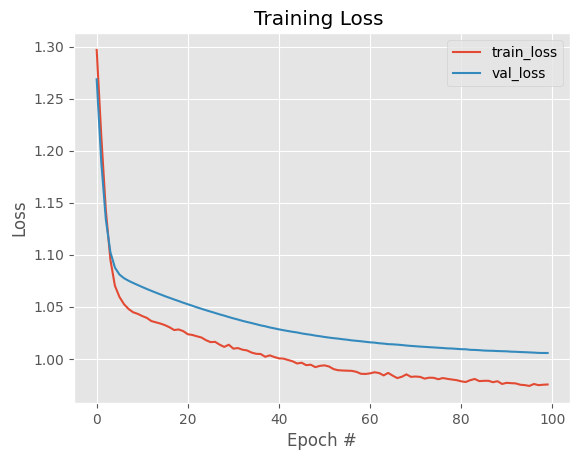

In [ ]:

activation_function_final = 'softmax'
learning_rate = 0.001
num_epochs = 100
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:

# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

108/108 [==============================] - 0s 2ms/step
Precisión: 59.35%


In [ ]:
predicted_labels


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[2048    0    0    0]
 [ 782    0    0    0]
 [ 392    0    0    0]
 [ 229    0    0    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      2048
           1       0.00      0.00      0.00       782
           2       0.00      0.00      0.00       392
           3       0.00      0.00      0.00       229

    accuracy                           0.59      3451
   macro avg       0.15      0.25      0.19      3451
weighted avg       0.35      0.59      0.44      3451

Accuracy score: 0.5935


Malos datos obtenidos debido al desbalanceo del dataset, no ha sabido predecir ninguno de los casos positivos de bullying

Se crea función de balanceo

In [ ]:
res_sin = df.loc[df['risk_bullying'] == 0]
res_1 = df.loc[df['risk_bullying'] == 1]
res_2 = df.loc[df['risk_bullying'] == 2]
res_3 = df.loc[df['risk_bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df.shape[0])}' )

In [ ]:
def Balance(df):
  cont_0 =0
  cont_1=0
  cont_2=0

  for index, row in df.iterrows():
    if cont_0 < 12000 and row['risk_bullying']==0 :
        df = df.drop(index)
        cont_0+=1
    if cont_1 < 3500 and row['risk_bullying']==1 :
        df = df.drop(index)
        cont_1+=1
    if cont_2 < 1000 and row['risk_bullying']==2 :
        df = df.drop(index)
        cont_2+=1
  return df

In [ ]:
df_balanced = Balance(df)

In [ ]:
res_sin = df_balanced.loc[df_balanced['risk_bullying'] == 0]
res_1 = df_balanced.loc[df_balanced['risk_bullying'] == 1]
res_2 = df_balanced.loc[df_balanced['risk_bullying'] == 2]
res_3 = df_balanced.loc[df_balanced['risk_bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced.shape[0])}' )

In [ ]:
x = df_balanced.drop(labels=['qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced['risk_bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)


In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)

In [ ]:
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:

activation_function_final = 'softmax'
learning_rate = 0.005
num_epochs = 250
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
df.head()

#Creamos de otra manera variable objetivo

In [ ]:
df = df.assign(bullying=np.zeros(df.shape[0]))
#df

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 and df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 1   
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 3
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 3
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 3
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 4

In [ ]:
df.head()

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
res_3 = df.loc[df['bullying'] == 3]
res_4 = df.loc[df['bullying'] == 4]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df.shape[0])}\ncon 4 bullying: {res_4.shape} {100*(res_3.shape[0]/df.shape[0])}' )

In [ ]:
def Balance2(df):
  cont=0
  cont2=0
  cont3=0

  for index, row in df.iterrows():
    if cont < 12000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 1800 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
    if cont3 < 1000 and row['bullying']==3 :
        df = df.drop(index)
        cont3+=1
  return df

In [ ]:
df_balanced2 = Balance2(df)

#df_balanced2


In [ ]:
res_sin = df_balanced2.loc[df_balanced2['bullying'] == 0]
res_1 = df_balanced2.loc[df_balanced2['bullying'] == 1]
res_2 = df_balanced2.loc[df_balanced2['bullying'] == 2]
res_3 = df_balanced2.loc[df_balanced2['bullying'] == 3]
res_4 = df_balanced2.loc[df_balanced2['bullying'] == 4]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced2.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced2.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced2.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced2.shape[0])}\ncon 4 bullying: {res_4.shape} {100*(res_4.shape[0]/df_balanced2.shape[0])}' )

In [ ]:
x = df_balanced2.drop(labels=['index','qn68 Cyber bullied in past 12 months', 'qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced2['bullying']
#print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:

activation_function_final = 'softmax'
learning_rate = 0.01
num_epochs = 500
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 250
batch_size = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(5, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()







#Creamos la variable objetivo agrupando de otra forma diferente

In [ ]:
df['bullying'] = 0 

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 and df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 1   
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 3

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
res_3 = df.loc[df['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df.shape[0])}' )

In [ ]:
def Balance3(df):
  cont=0
  cont2=0
  cont3=0

  for index, row in df.iterrows():
    if cont < 12000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 4000 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
   
  return df

In [ ]:
df_balanced3 = Balance3(df)

df_balanced3.head()

In [ ]:
res_sin = df_balanced3.loc[df['bullying'] == 0]
res_1 = df_balanced3.loc[df['bullying'] == 1]
res_2 = df_balanced3.loc[df['bullying'] == 2]
res_3 = df_balanced3.loc[df['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced3.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced3.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced3.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced3.shape[0])}' )

In [ ]:
x = df_balanced3.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced3['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0005
num_epochs = 300
batch_size = 250

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

# Realizamos el modelo con Cyber como variable

In [ ]:
df['bullying'] = 0 #'qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months'

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2:
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2: 
      df.loc[i, 'bullying'] = 0
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1:
      df.loc[i, 'bullying'] = 1   
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1: 
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
      df.loc[i, 'bullying'] = 2
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
      df.loc[i, 'bullying'] = 1
 




In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
print(df.shape)
print(res_sin.shape[0]+res_1.shape[0]+res_2.shape[0])

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}' )

In [ ]:
def Balance4(df):
  cont=0
  
  cont1=0

  for index, row in df.iterrows():
    if cont < 13000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont1 < 2000 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
  return df

In [ ]:
df_balanced4 = Balance4(df)

df_balanced4.head()

In [ ]:
res_sin = df_balanced4.loc[df_balanced4['bullying'] == 0]
res_1 = df_balanced4.loc[df_balanced4['bullying'] == 1]
res_2 = df_balanced4.loc[df_balanced4['bullying'] == 2]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced4.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced4.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced4.shape[0])}' )

In [ ]:
df_balanced4.head()

In [ ]:
x = df_balanced4.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced4['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, shuffle=True,random_state=42)
num_classes = 3
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 400
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(3, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Despues de os datos obtenidos llegos a la conclusion de que no existe diferencia entre los bullying fuera o dentro del colegio, por lo que vamos a generar un modelo para precisar estos datos

In [ ]:
df['bullying'] = 0 #'qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months'

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2:
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2: 
      df.loc[i, 'bullying'] = 0
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1:
      df.loc[i, 'bullying'] = 1   
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1: 
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
      df.loc[i, 'bullying'] = 1
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
      df.loc[i, 'bullying'] = 1
 

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]

print(df.shape)
print(res_sin.shape[0]+res_1.shape[0]+res_2.shape[0])

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}' )

In [ ]:
def Balance6(df):
  cont=0
  
  cont1=0

  for index, row in df.iterrows():
    if cont < 7000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
 
  return df

In [ ]:
df_balanced6 = Balance6(df)

df_balanced6.head()

In [ ]:
res_sin = df_balanced6.loc[df_balanced6['bullying'] == 0]
res_1 = df_balanced6.loc[df_balanced6['bullying'] == 1]


print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced6.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced6.shape[0])}' )

In [ ]:
x = df_balanced6.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced6['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 300

model = Sequential()
model.add(Dense(1200, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(900, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)
model.save("model_1.h5")
# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

#No encuentra ningun caso positivo de bullying

Creamos un modelo dando mas peso a la varible 1 para que el modelo entrene mejor para predecir esta varible

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros del modelo
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 300

# Definir la función de pérdida ponderada
from keras import backend as K
# Definir pesos de clases
class_weight = {0: 1, 1: 5}
def weighted_binary_crossentropy(y_true, y_pred):
    # Pesos de las clases
    class_weights = K.constant([1, 5]) # Dar un peso mayor a la clase 1
    
    # Función de pérdida
    y_pred = K.clip(y_pred, K.epsilon(), 1-K.epsilon())
    weighted_cross_entropy = -(y_true * K.log(y_pred) * class_weights)
    return K.mean(weighted_cross_entropy, axis=-1)


# Definir el modelo
model = Sequential()
model.add(Dense(1200, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(900, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilar el modelo con la función de pérdida ponderada y el optimizador Adam
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenar el modelo
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size, class_weight=class_weight)

# Guardar el modelo
model.save("model_2.h5")

# Evaluar el modelo con los datos de prueba
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

El modelo ha mejora en cuanto a la predicción de la varible 1

In [ ]:
from keras.models import load_model

# Cargar el modelo guardado
model_1 = load_model('model_1.h5')
model_2 = load_model('model_2.h5')

##Ensamblaje de ambos modelos

Vamos mediante los dos modelos anteriores crear un nuevo modelo

In [ ]:
# Obtener las predicciones del modelo 1
pred_1 = model_1.predict(x_test)

# Obtener las predicciones del modelo 2
pred_2 = model_2.predict(x_test)

# Calcular la predicción promedio de los dos modelos
pred_avg = (pred_1 + pred_2) / 2

# Redondear las predicciones promedio a la clase más cercana (0 o 1)
pred_labels = np.round(pred_avg)

# Definir modelo ensamblado
model_ensemble = Sequential()
model_ensemble.add(Dense(32, input_shape=(x_test.shape[1],), activation='relu'))
model_ensemble.add(Dense(16, activation='relu'))
model_ensemble.add(Dense(2, activation='sigmoid'))
model_ensemble.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluar el modelo ensamblado
print("[INFO]: Evaluando modelo ensamblado...")
ensemble_acc = accuracy_score(y_test, pred_labels)
print("Accuracy del modelo ensamblado: {:.2f}%".format(ensemble_acc * 100))

# Entrenar modelo ensamblado
model_ensemble.fit(x_test, y_test, epochs=10, batch_size=32, verbose=0)

# Obtener predicciones del modelo ensamblado
predictions = model_ensemble.predict(x_test, batch_size=batch_size)

# Obtener las predicciones del modelo
predictions = model_ensemble.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Obtener las predicciones del modelo
predictions = model_ensemble.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Ha mejorado la accuracy del modelo pero tenemos overffiting

In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2:
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2: 
      df.loc[i, 'bullying'] = 0
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1:
      df.loc[i, 'bullying'] = 1   
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1: 
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
      df.loc[i, 'bullying'] = 2
    if df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
      df.loc[i, 'bullying'] = 1
 


In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
print(df.shape)
print(res_sin.shape[0]+res_1.shape[0]+res_2.shape[0])

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}' )

In [ ]:
def Balance4(df):
  cont=0
  
  cont1=0

  for index, row in df.iterrows():
    if cont < 13000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont1 < 2000 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
  return df

In [ ]:
df_balanced4 = Balance4(df)



In [ ]:
res_sin = df_balanced4.loc[df_balanced4['bullying'] == 0]
res_1 = df_balanced4.loc[df_balanced4['bullying'] == 1]
res_2 = df_balanced4.loc[df_balanced4['bullying'] == 2]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced4.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced4.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced4.shape[0])}' )

In [ ]:
x = df_balanced4.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced4['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, shuffle=True,random_state=42)
num_classes = 3
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.00005
num_epochs = 500
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(3, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Realizamos dos modelos por genero

In [ ]:
df['bullying'] = 0  #'qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months'

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 and df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 1   
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 and df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 3

In [ ]:
chicos = df[df['q2 Sex'] == 1]
chicas = df[df['q2 Sex'] == 2]
print(f'el dataset de niños: {chicos.shape}\nel datset de las niñas: {chicas.shape}')

In [ ]:
res_sin = chicos.loc[chicos['bullying'] == 0]
res_1 = chicos.loc[chicos['bullying'] == 1]
res_2 = chicos.loc[chicos['bullying'] == 2]
res_3 = chicos.loc[chicos['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/chicos.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/chicos.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/chicos.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/chicos.shape[0])}' )

In [ ]:
def Balance5_o(df):
  cont=0
  cont1=0
  cont2=0

  for index, row in df.iterrows():
    if cont < 6200 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
   
    if cont2 < 2000 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df


In [ ]:
df_balanced5_o = Balance5_o(chicos)

#df_balanced5_o

In [ ]:
res_sin = df_balanced5_o.loc[df_balanced5_o['bullying'] == 0]
res_1 = df_balanced5_o.loc[df_balanced5_o['bullying'] == 1]
res_2 = df_balanced5_o.loc[df_balanced5_o['bullying'] == 2]
res_3 = df_balanced5_o.loc[df_balanced5_o['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced5_o.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced5_o.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced5_o.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced5_o.shape[0])}' )

In [ ]:
x = df_balanced5_o.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced5_o['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, shuffle=True,random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 400
batch_size = 260

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
res_sin = chicas.loc[chicas['bullying'] == 0]
res_1 = chicas.loc[chicas['bullying'] == 1]
res_2 = chicas.loc[chicas['bullying'] == 2]
res_3 = chicas.loc[chicas['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/chicas.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/chicos.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/chicas.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/chicas.shape[0])}' )

In [ ]:
def Balance7_o(df):
  cont=0
  
  cont2=0

  for index, row in df.iterrows():
    if cont < 6000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 2000 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df

In [ ]:
df_balanced7_o = Balance7_o(chicas)

df_balanced7_o

In [ ]:
res_sin = df_balanced7_o.loc[df_balanced7_o['bullying'] == 0]
res_1 = df_balanced7_o.loc[df_balanced7_o['bullying'] == 1]
res_2 = df_balanced7_o.loc[df_balanced7_o['bullying'] == 2]
res_3 = df_balanced7_o.loc[df_balanced7_o['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced7_o.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced7_o.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced7_o.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced7_o.shape[0])}' )

In [ ]:
x = df_balanced7_o.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced7_o['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.001
num_epochs = 300
batch_size = 120

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

# edad

In [ ]:
df.head()

In [ ]:
menor = df[df['q1 Custom Age'] <=4]
mayor = df[df['q1 Custom Age'] >4]
print(f'el dataset de menor: {menor.shape}\nel datset de las mayor: {mayor.shape}')

In [ ]:
menor.head()

In [ ]:
res_sin = menor.loc[menor['bullying'] == 0]
res_1 = menor.loc[menor['bullying'] == 1]
res_2 = menor.loc[menor['bullying'] == 2]
res_3 = menor.loc[menor['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/menor.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/menor.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/menor.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/menor.shape[0])}' )

In [ ]:
def Balance8(df):
  cont=0
  cont1=0
  cont2=0

  for index, row in df.iterrows():
    if cont < 4500 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont1 < 1500 and row['bullying']==2 :
        df = df.drop(index)
        cont1+=1
    
  return df

In [ ]:
df_balanced8 = Balance8(menor)

df_balanced8.head()

In [ ]:
res_sin = df_balanced8.loc[df_balanced8['bullying'] == 0]
res_1 = df_balanced8.loc[df_balanced8['bullying'] == 1]
res_2 = df_balanced8.loc[df_balanced8['bullying'] == 2]
res_3 = df_balanced8.loc[df_balanced8['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced8.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced8.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced8.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced8.shape[0])}' )

In [ ]:
x = df_balanced8.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced8['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0005
num_epochs = 300
batch_size = 120

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
res_sin = mayor.loc[mayor['bullying'] == 0]
res_1 = mayor.loc[mayor['bullying'] == 1]
res_2 = mayor.loc[mayor['bullying'] == 2]
res_3 = mayor.loc[mayor['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/mayor.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/mayor.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/mayor.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/mayor.shape[0])}' )

In [ ]:
def Balance9(df):
  cont=0
  
  cont2=0

  for index, row in df.iterrows():
    if cont < 7800 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 2200 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df

In [ ]:
df_balanced9 = Balance9(mayor)

df_balanced9

In [ ]:
res_sin = df_balanced9.loc[df_balanced9['bullying'] == 0]
res_1 = df_balanced9.loc[df_balanced9['bullying'] == 1]
res_2 = df_balanced9.loc[df_balanced9['bullying'] == 2]
res_3 = df_balanced9.loc[df_balanced9['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced9.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced9.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced9.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced9.shape[0])}' )

In [ ]:
x = df_balanced9.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced9['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 300
batch_size = 160

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

##Modelo Creando la variable objetivo con 2 valores 

In [ ]:
df.head()

In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 2 and df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 2 and df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 2:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'qn68 Cyber bullied in past 12 months'] == 1 or df.loc[i, 'qn66 Bullied on school property in past 12 months'] == 1 or df.loc[i, 'qn67 Bullied not on school property in past 12 months'] == 1 :
    df.loc[i, 'bullying'] = 1   
  

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\n' )



In [ ]:
def Balance10(df):
  cont=0

  for index, row in df.iterrows():
    if cont < 3500 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
   
  return df

In [ ]:
df_balanced10 = Balance10(df)

In [ ]:
res_sin = df_balanced10.loc[df_balanced10['bullying'] == 0]
res_1 = df_balanced10.loc[df_balanced10['bullying'] == 1]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced10.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced10.shape[0])}\n' )

In [ ]:
x = df_balanced10.drop(labels=['index','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced10['bullying']
print(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 300
batch_size = 160

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
df.head()

In [ ]:
df.shape

##Physically attacked


#Cambiamos la variable objetivo para predecir la columna de ataque físico, los casos más altos de bullying

In [ ]:
unique_values = df['q15 Physically attacked'].unique()
print(unique_values)

[1. 2. 3. 4. 7. 5. 8. 6.]


In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'q15 Physically attacked'] == 1:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'q15 Physically attacked'] > 1:
    df.loc[i, 'bullying'] = 1   
  

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\n' )

sin bullying: (19427, 55) 84.46154515021085
con 1 bullying: (3574, 55) 15.53845484978914



In [ ]:
def Balance11(df):
  cont=0

  for index, row in df.iterrows():
    if cont < 16000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
   
  return df

In [ ]:
df_balanced11 = Balance11(df)
df_balanced11.head()

,index,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,any_bullying,risk_bullying,bullying
7,7,3.0,2.0,2.0,1.58,32.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,8.0,2.0,3.0,3.0,1.0,2.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,1
8,8,3.0,1.0,2.0,1.75,54.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,3.0,3.0,2.0,3.0,5.0,5.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1
9,9,3.0,2.0,2.0,1.65,49.0,1.0,3.0,3.0,3.0,2.0,4.0,8.0,3.0,3.0,1.0,1.0,3.0,4.0,2.0,1.0,5.0,6.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,8.0,2.0,6.0,2.0,3.0,1.0,3.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1
13,13,3.0,1.0,4.0,1.69,52.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,6.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,1
17,17,4.0,1.0,2.0,1.44,122.0,3.0,2.0,2.0,4.0,2.0,3.0,3.0,5.0,2.0,1.0,1.0,2.0,1.0,6.0,1.0,5.0,2.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,6.0,4.0,1.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1


In [ ]:
res_sin = df_balanced11.loc[df_balanced11['bullying'] == 0]
res_1 = df_balanced11.loc[df_balanced11['bullying'] == 1]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced11.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced11.shape[0])}\n' )

sin bullying: (3427, 55) 48.950149978574494
con 1 bullying: (3574, 55) 51.04985002142551



In [ ]:
x = df_balanced11.drop(labels=['index','level_0','q15 Physically attacked','any_bullying','risk_bullying','bullying','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months'], axis=1)
print(x.head())
y=df_balanced11['bullying']
#print(y)

    q1 Custom Age  q2 Sex  q3 In what grade are you  q4 How tall are you  \
7             3.0     2.0                       2.0                 1.58   
8             3.0     1.0                       2.0                 1.75   
9             3.0     2.0                       2.0                 1.65   
13            3.0     1.0                       4.0                 1.69   
17            4.0     1.0                       2.0                 1.44   

    q5 How much do you weigh  q6 How often went hungry  q10 Fast food eating   \
7                       32.0                       3.0                    1.0   
8                       54.0                       1.0                    1.0   
9                       49.0                       1.0                    3.0   
13                      52.0                       3.0                    1.0   
17                     122.0                       3.0                    2.0   

    q16 Physical fighting  q17 Seriously injured  q18 Se

In [ ]:
x = df_balanced11.drop(labels=['index','q15 Physically attacked','risk_bullying','bullying','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months'], axis=1)
print(x.head())
y=df_balanced11['bullying']
#print(y)

    q1 Custom Age  q2 Sex  q3 In what grade are you  q4 How tall are you  \
7             3.0     2.0                       2.0                 1.58   
8             3.0     1.0                       2.0                 1.75   
9             3.0     2.0                       2.0                 1.65   
13            3.0     1.0                       4.0                 1.69   
17            4.0     1.0                       2.0                 1.44   

    q5 How much do you weigh  q6 How often went hungry  q10 Fast food eating   \
7                       32.0                       3.0                    1.0   
8                       54.0                       1.0                    1.0   
9                       49.0                       1.0                    3.0   
13                      52.0                       3.0                    1.0   
17                     122.0                       3.0                    2.0   

    q16 Physical fighting  q17 Seriously injured  q18 Se

In [ ]:
from keras.utils import to_categorical
from keras import regularizers
from keras.optimizers import Adam

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,shuffle=True ,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True ,random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/500
27/27 [==============================] - 1s 12ms/step - loss: 7.0700 - accuracy: 0.5369 - val_loss: 6.8198 - val_accuracy: 0.6034
Epoch 2/500
27/27 [==============================] - 0s 5ms/step - loss: 6.5965 - accuracy: 0.6284 - val_loss: 6.3653 - val_accuracy: 0.6269
Epoch 3/500
27/27 [==============================] - 0s 5ms/step - loss: 6.1564 - accuracy: 0.6504 - val_loss: 5.9439 - val_accuracy: 0.6420
Epoch 4/500
27/27 [==============================] - 0s 6ms/step - loss: 5.7471 - accuracy: 0.6689 - val_loss: 5.5548 - val_accuracy: 0.6588
Epoch 5/500
27/27 [==============================] - 0s 5ms/step - loss: 5.3703 - accuracy: 0.6682 - val_loss: 5.1982 - val_accuracy: 0.6622
Epoch 6/500
27/27 [==============================] - 0s 5ms/step - loss: 5.0227 - accuracy: 0.6824 - val_loss: 4.8660 - val_accuracy: 0.6857
Epoch 7/500
27/27 [==============================] - 0s 5ms/step - loss: 4.7026 - accuracy: 0.6913 - val_loss: 4.5637 

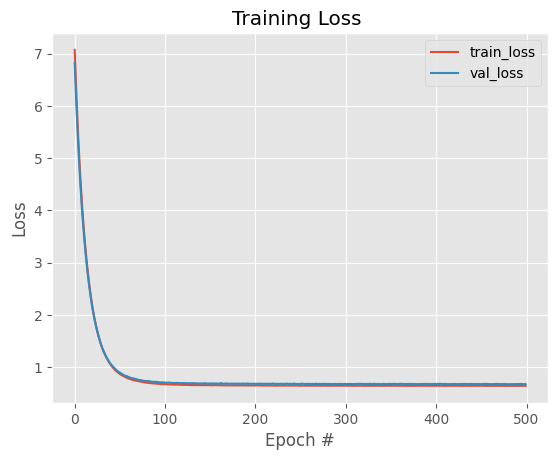

In [ ]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 500
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

33/33 [==============================] - 0s 2ms/step
Precisión: 69.46%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[370 146]
 [175 360]]

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       516
           1       0.71      0.67      0.69       535

    accuracy                           0.69      1051
   macro avg       0.70      0.69      0.69      1051
weighted avg       0.70      0.69      0.69      1051

Accuracy score: 0.6946


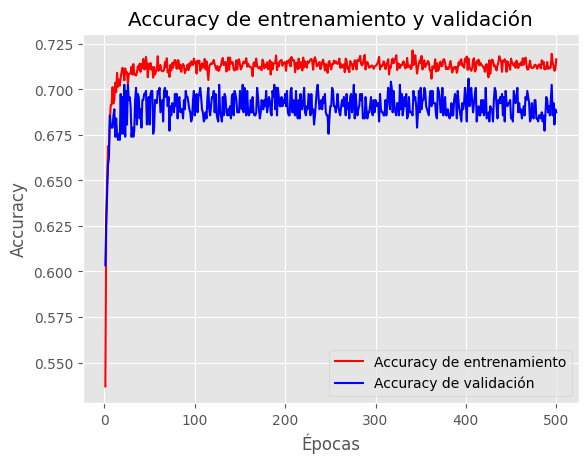

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
df_corre = df.drop(labels=['any_bullying','risk_bullying','bullying','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months', 'qn68 Cyber bullied in past 12 months',"index",'level_0'], axis=1)
print(df_corre.head())

In [ ]:
correlation_matrix = df_corre.corr()
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
print(correlation_matrix)

##Búsqueda de Hiperparámetros
`



In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import RMSprop

In [ ]:
def create_model(activation_function_final='sigmoid', learning_rate=0.0001, l2_reg=0.01, n_neuronas=560, n_neuronas_1=300, batch_size=32, loss='categorical_crossentropy', optimizer='Adam'):
    model = Sequential()
    model.add(Dense(n_neuronas, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=l2_reg)))
    model.add(Dense(n_neuronas_1, activation='relu', kernel_regularizer=regularizers.l2(l=l2_reg)))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=l2_reg)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=l2_reg)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=l2_reg)))
    model.add(Flatten())
    model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=l2_reg)))

    if optimizer == 'SGD':
        opt = SGD(lr=learning_rate, momentum=0.9)
    elif optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(loss=loss, optimizer=opt, metrics=["accuracy"])

    return model

In [ ]:
# Crear el modelo KerasClassifier para usar con GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Definir la grilla de valores para los hiperparámetros
param_grid = {
    'activation_function_final': ['sigmoid', 'softmax'],
    'learning_rate': [0.0001, 0.001, 0.01],
    'l2_reg': [0.01, 0.1, 1],
    'n_neuronas':[800,512,1000],
    'n_neuronas_1':[400,256,500],
    'batch_size': [64,100,200],
    'loss': ['categorical_crossentropy', 'binary_crossentropy'],
    'optimizer': ['SGD', 'Adam', 'RMSprop']
}

# Realizar la búsqueda de hiperparámetros
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Mostrar los resultados de la búsqueda de hiperparámetros
print(f"Mejor: {grid_result.best_score_} utilizando {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"{mean} ({std}) con: {param}")